In [1]:
# Sentiment Analysis of product reviews sold on e-commerce platforms

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


data = pd.read_csv("flipkart.csv")
data.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [4]:
data.shape

(2304, 4)

In [5]:
data.columns

Index(['Unnamed: 0', 'Product_name', 'Review', 'Rating'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2304 non-null   int64 
 1   Product_name  2304 non-null   object
 2   Review        2304 non-null   object
 3   Rating        2304 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 72.1+ KB


In [7]:
data.isna().sum()

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64

In [8]:
# Cleaning reviews column

import nltk

nltk.download("stopwords")

# to remove morphological affixes from words, leaving only the word stem
stemmer = nltk.SnowballStemmer('english')

[nltk_data] Downloading package stopwords to /home/lowin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import re
from nltk.corpus import stopwords
import string

stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
def clean(text):
    text = str(text).lower()

    # re.sub(pat, replacement, str) 
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)

    text = [stemmer.stem(word) for word in text.split(' ')]

    return " ".join(text)

data['Review'] = data['Review'].apply(clean)


In [11]:
ratings = data['Rating'].value_counts()
ratings

Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64

In [12]:
# Ratings they give to products they purchase from flipkart
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data,
                values = quantity,
                names = numbers,
                hole = 0.5)

figure.show()

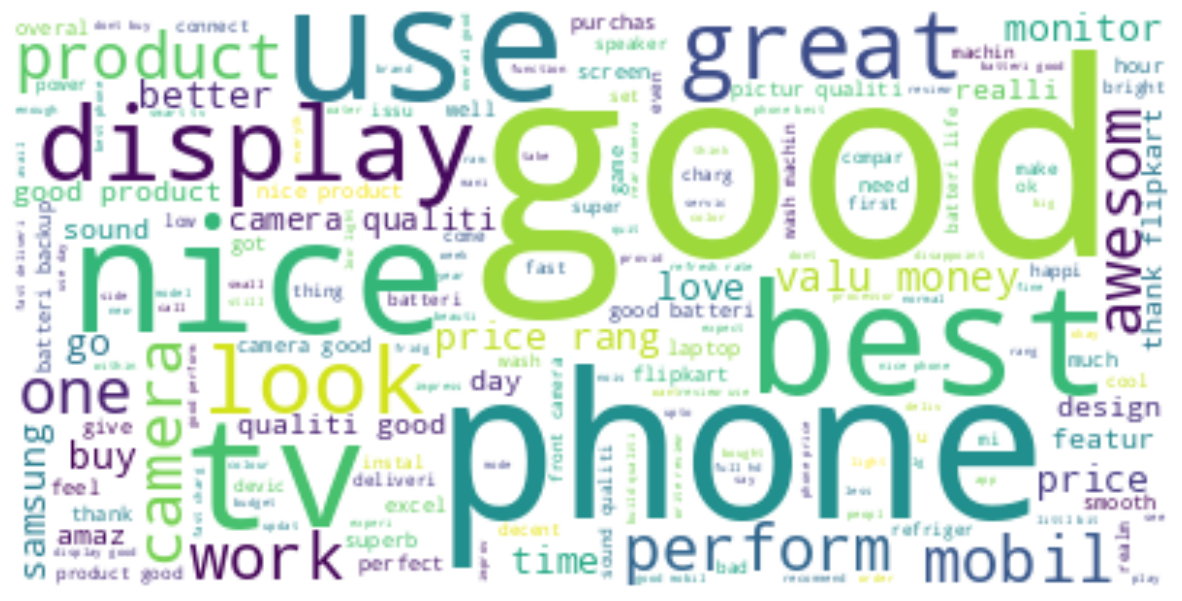

In [16]:
# word cloud to visualize the most used words in the reviews 

text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white').generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
# Three additional cols as positive, negative and neutral based on the sentiment scores of reviews

# Valence Aware Dictionary and sEntiment Reasoner - lexicon and rule-based sentiment analysis
nltk.download('vader_lexicon')

sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['Review']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['Review']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['Review']] 

data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lowin/nltk_data...


,Unnamed: 0,Product_name,Review,Rating,Positive,Negative,Neutral
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around backup bi...,5,0.395,0.101,0.504
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5,0.744,0.000,0.256
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5,0.277,0.000,0.723
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5,0.512,0.000,0.488
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5,0.000,0.000,1.000


In [19]:
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])

def sentiment_eval(a, b, c):
    if (a > b and a > c):
        print("Positive :)")

    elif (b > a and b > c):
        print("Negative :(")

    else:
        print("Neutral :|")

sentiment_eval(x, y, z)
print("Positive :) ", x)
print("Negative :( ", y)
print("Neutral  :| ", z)

Neutral :|
Positive :)  923.5529999999985
Negative :(  96.77500000000013
Neutral  :|  1283.6880000000006
